# Introduction to data analysis with pandas

NICAR 2022, Jonathan Soma / js4571@columbia.edu / [@dangerscarf](https://twitter.com/dangerscarf)

With a very simple, very incorrect, very boring dataset called `countries.csv`.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("countries.csv")
df.head()

,country,continent,life_expectancy,population,gdp
0,Afghanistan,Asia,54.863,22856302,15153728226
1,Albania,Europe,74.200,3071856,12886435920
2,Algeria,Africa,68.963,30533827,155661450046
3,Angola,Africa,45.234,13926373,34063908358
4,Antigua and Barbuda,N. America,73.544,77656,989182128


## Sorting

In [3]:
df.sort_values(by='population')

,country,continent,life_expectancy,population,gdp
64,Greenland,N. America,67.030,56196,1865931984
4,Antigua and Barbuda,N. America,73.544,77656,989182128
146,Seychelles,Africa,71.771,78685,1198372550
87,Kiribati,Oceania,64.642,84010,294119010
169,Tonga,Oceania,70.810,97935,478510410
...,...,...,...,...,...
22,Brazil,S. America,70.261,174425387,1405170917672
76,Indonesia,Asia,67.289,213395411,579155145454
178,United States,N. America,76.800,282496310,11231488292980
75,India,Asia,62.129,1053898107,1736824080336


In [4]:
df.sort_values(by='population', ascending=False)

,country,continent,life_expectancy,population,gdp
34,China,Asia,72.124,1269116737,4323880722959
75,India,Asia,62.129,1053898107,1736824080336
178,United States,N. America,76.800,282496310,11231488292980
76,Indonesia,Asia,67.289,213395411,579155145454
22,Brazil,S. America,70.261,174425387,1405170917672
...,...,...,...,...,...
169,Tonga,Oceania,70.810,97935,478510410
87,Kiribati,Oceania,64.642,84010,294119010
146,Seychelles,Africa,71.771,78685,1198372550
4,Antigua and Barbuda,N. America,73.544,77656,989182128


## Summary statistics

In [5]:
# What's the median life expectancy?
df.life_expectancy.median()

70.04150000000001

In [6]:
# What's the sum of every row's population?
df.population.sum()

6115042358

In [7]:
# What's the median population?
df.population.median()

6888970.5

In [23]:
# Let's get a lot of different calculations
df.life_expectancy.describe()

count    188.000000
mean      66.501536
std       10.298458
min       38.123000
25%       59.663750
50%       70.041500
75%       74.134500
max       81.350000
Name: life_expectancy, dtype: float64

In [24]:
# How many countries are on each continent?
df.continent.value_counts()

Africa        54
Asia          48
Europe        42
N. America    22
S. America    12
Oceania       10
Name: continent, dtype: int64

### Plot it!

<AxesSubplot:>

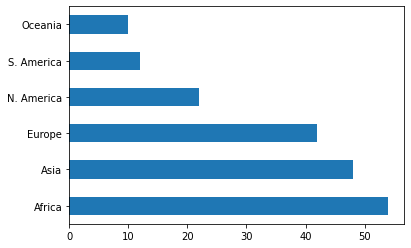

In [36]:
# How many countries are on each continent?
df.continent.value_counts().plot(kind='barh')

<AxesSubplot:>

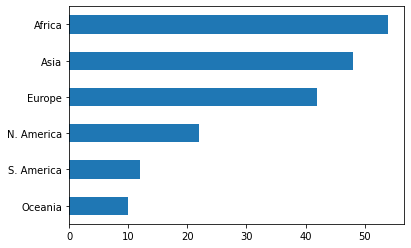

In [37]:
# How many countries are on each continent?
# Plot with biggest on top
df.continent.value_counts().sort_values().plot(kind='barh')

## Grouped statistics

In [25]:
# Mean life expectancy by continent
df.groupby('continent').life_expectancy.median()

continent
Africa        52.1025
Asia          70.4275
Europe        75.5800
N. America    70.5765
Oceania       67.4955
S. America    70.7660
Name: life_expectancy, dtype: float64

In [26]:
# Total population by continent
df.groupby('continent').population.sum()

continent
Africa         809892820
Asia          3849172861
Europe         596440013
N. America     481999240
Oceania         30272328
S. America     347265096
Name: population, dtype: int64

## Calculating new columns

In [27]:
# Calculate the per-capita GDP
df['per_capita_gdp'] = df.gdp / df.population
df.head()

,country,continent,life_expectancy,population,gdp,per_capita_gdp
0,Afghanistan,Asia,54.863,22856302,15153728226,663.0
1,Albania,Europe,74.200,3071856,12886435920,4195.0
2,Algeria,Africa,68.963,30533827,155661450046,5098.0
3,Angola,Africa,45.234,13926373,34063908358,2446.0
4,Antigua and Barbuda,N. America,73.544,77656,989182128,12738.0


In [29]:
# Who has the highest per-capita GDP?
df.sort_values(by='per_capita_gdp', ascending=False).head()

,country,continent,life_expectancy,population,gdp,per_capita_gdp
99,Luxembourg,Europe,77.820,435491,27838326684,63924.0
135,Qatar,Asia,76.680,590957,35690257058,60394.0
23,Brunei,Asia,75.927,327036,15704268720,48020.0
125,Norway,Europe,78.760,4490859,193888346466,43174.0
178,United States,N. America,76.800,282496310,11231488292980,39758.0


## Graphing

<AxesSubplot:ylabel='country'>

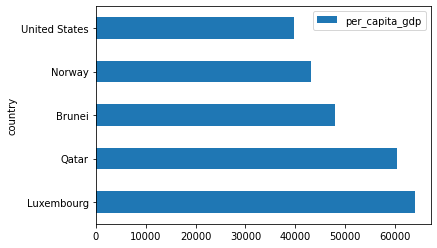

In [34]:
df.sort_values(by='per_capita_gdp', ascending=False).head().plot(y='per_capita_gdp', x='country', kind='barh')

## Filtering

In [12]:
df[df.continent == 'Africa']

,country,continent,life_expectancy,population,gdp,per_capita_gdp
2,Algeria,Africa,68.9630,30533827,155661450046,5098.0
3,Angola,Africa,45.2340,13926373,34063908358,2446.0
17,Benin,Africa,55.2610,6517810,8518777670,1307.0
21,Botswana,Africa,50.5670,1757925,17767347975,10107.0
25,Burkina Faso,Africa,50.5890,12294012,12306306012,1001.0
26,Burundi,Africa,48.2510,6374347,2823835721,443.0
28,Cameroon,Africa,51.9600,15678269,28267919007,1803.0
30,Cape Verde,Africa,69.8350,437238,1001712258,2291.0
31,Central African Rep.,Africa,43.7270,3701607,2820624534,762.0
32,Chad,Africa,46.7080,8222327,8362106559,1017.0


In [46]:
africa = df[df.continent == 'Africa']

In [47]:
africa.sort_values(by='per_capita_gdp', ascending=False).head()

,country,continent,life_expectancy,population,gdp,per_capita_gdp
146,Seychelles,Africa,71.771,78685,1198372550,15230.0
58,Gabon,Africa,59.744,1235274,15767037336,12764.0
21,Botswana,Africa,50.567,1757925,17767347975,10107.0
97,Libya,Africa,71.872,5231189,47807836271,9139.0
109,Mauritius,Africa,71.202,1196027,9915063830,8290.0


<AxesSubplot:ylabel='country'>

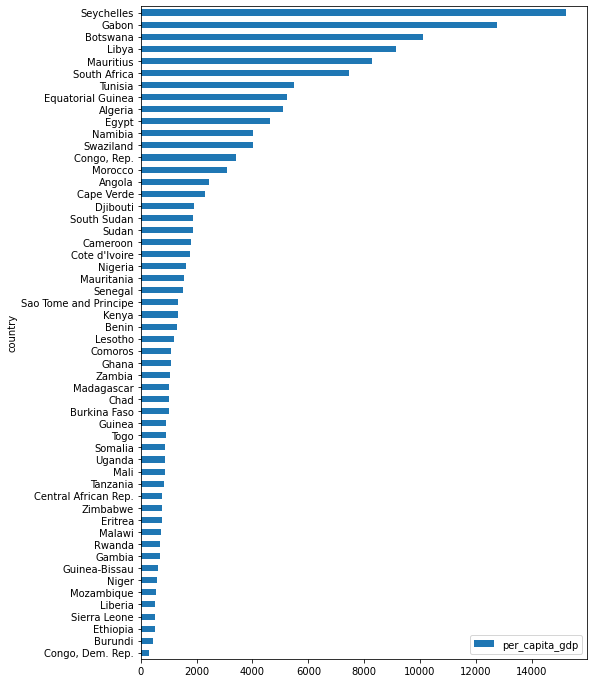

In [48]:
africa.sort_values(by='per_capita_gdp').plot(
    x='country',
    y='per_capita_gdp',
    kind='barh',
    figsize=(8,12)
)